In [1]:
import torch
import transformers
import datasets
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

print("PyTorch version:", torch.__version__)
print("Transformers version:", transformers.__version__)
print("Datasets version:", datasets.__version__)


PyTorch version: 2.6.0+cpu
Transformers version: 4.49.0
Datasets version: 3.3.2


In [2]:
from datasets import load_dataset

# Load multilingual sentiment dataset (all languages)
sentiment_dataset = load_dataset("tyqiangz/multilingual-sentiments", "all")


# Load the Emotion dataset
emotion_dataset = load_dataset("dair-ai/emotion")

print(sentiment_dataset)
print(emotion_dataset)

# Inspect samples
print(sentiment_dataset['train'][0])
print(emotion_dataset['train'][0])



DatasetDict({
    train: Dataset({
        features: ['text', 'source', 'language', 'label'],
        num_rows: 270399
    })
    validation: Dataset({
        features: ['text', 'source', 'language', 'label'],
        num_rows: 10857
    })
    test: Dataset({
        features: ['text', 'source', 'language', 'label'],
        num_rows: 14465
    })
})
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
{'text': 'yang memerlukan pemerhatian dan tindakan serius', 'source': 'malaya', 'language': 'malay', 'label': 0}
{'text': 'i didnt feel humiliated', 'label': 0}


In [9]:
import pandas as pd

# Convert Sentiment Dataset
sentiment_df = pd.DataFrame(sentiment_dataset['train'])

# Convert Emotion Dataset
emotion_df = pd.DataFrame(emotion_dataset['train'])

# Quick look
print(sentiment_df.head())
print(emotion_df.head())


                                                text  source language  label
0    yang memerlukan pemerhatian dan tindakan serius  malaya    malay      0
1  sentiasa memikirkan dan merancang inisiatif ba...  malaya    malay      0
2  Kita akan tengok daripada pelbagai aspek supay...  malaya    malay      0
3  justeru asean perlu mengambil tindakan sebagai...  malaya    malay      0
4  @_Niiar_ Jangan punah dulu, aku belum ke labua...  malaya    malay      1
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [13]:
emotion_label_mapping = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# Convert labels to emotions clearly in your dataframe
emotion_df['emotion'] = emotion_df['label'].map(emotion_dataset['train'].features['label'].int2str)


In [14]:
# Sentiment distribution
sentiment_counts = sentiment_df['label'].value_counts()
print(sentiment_counts)

# Emotion distribution
emotion_counts = emotion_df['label'].value_counts()
print(emotion_counts)


label
0    93476
2    90157
1    86766
Name: count, dtype: int64
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


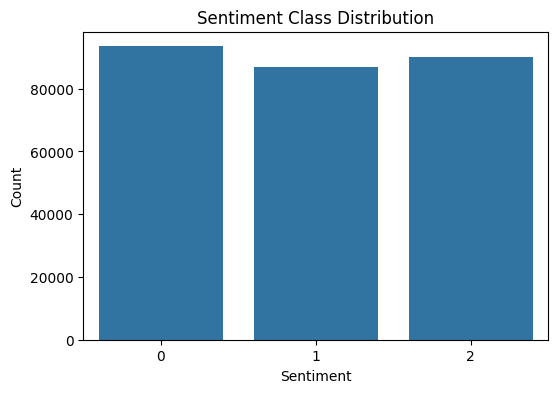

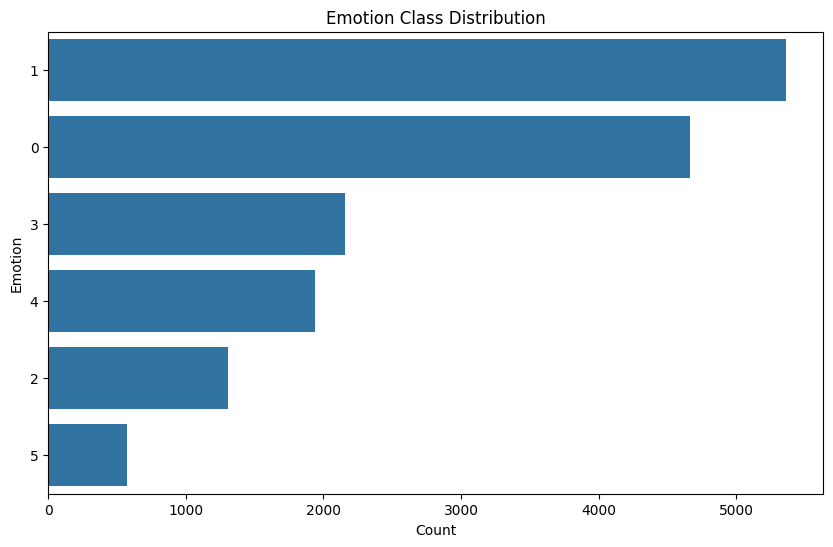

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution Plot
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=sentiment_df)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Emotion Distribution Plot
plt.figure(figsize=(10,6))
sns.countplot(y='label', data=emotion_df, order=emotion_counts.index)
plt.title('Emotion Class Distribution')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()


In [17]:
sentiment_df.to_csv("../data/sentiment_dataset.csv", index=False)
emotion_df.to_csv("../data/emotion_dataset.csv", index=False)
